# About the Project
Our project focuses on Air Pollution Forecasting Using Machine Learning, which leverages advanced algorithms to predict future pollutant levels, including ozone, carbon monoxide (CO), sulfur dioxide (SO2), nitrogen dioxide (NO2), PM10, and PM2.5. With air quality being a growing concern in urban areas, our goal is to develop a data-driven approach to forecast pollution levels accurately for proactive measures and better air quality management. By analyzing historical data and extracting meaningful patterns, our model empowers stakeholders, such as government agencies, environmental organizations, and the general public, to take informed actions to safeguard public health.

# Need for This Project
Air pollution poses severe health risks, including respiratory problems, cardiovascular diseases, and long-term damage to ecosystems. The World Health Organization (WHO) estimates that air pollution causes millions of premature deaths each year, emphasizing the urgent need for predictive and preventive measures. Our project addresses this pressing issue by providing timely and accurate forecasts of air quality. This proactive approach enables effective planning, like issuing warnings, adjusting traffic patterns, or limiting industrial emissions, ultimately aiming to reduce the adverse impact on human health and the environment. The implementation of a reliable forecasting model is crucial for creating sustainable, healthier cities and improving overall quality of life.



## About the Team Members
Dr. Deepali Sharma – Mentor: Dr. Deepali Sharma provides invaluable guidance and mentorship throughout the project. Her expertise in environmental science and data-driven research supports the team in developing a scientifically sound and impactful solution.

Kumar Atharva Rustagi – Data Analyst: Kumar specializes in data analysis and visualization, ensuring that the project leverages insights from data in the most effective manner. His expertise in data wrangling and statistical analysis plays a critical role in understanding historical patterns and trends.

Akanksha Gupta – Front End Developer: Akanksha is responsible for designing an intuitive and user-friendly interface for the project. Her experience in front-end technologies ensures that users can easily access and interpret air quality predictions, making the system both accessible and impactful.

M. Amaresh – ML Engineer: Amaresh is the core architect of the machine learning models used in the project. With a strong background in model development, hyperparameter tuning, and deployment, he ensures that the forecasts are accurate and optimized for real-time use.


## Step1: Data Preprocessing 
Load Data: Read the dataset and inspect for any inconsistencies.
Date Parsing: Convert 'From Date' and 'To Date' into datetime objects and create a 'Duration' feature if necessary.
Handle Missing Values: Check for missing values in the pollutant columns (Ozone, CO, SO2, etc.) and decide on appropriate imputation techniques.
Feature Engineering:
Create additional time-based features like day, month, season, or day of the week, which could help capture seasonal pollution trends.
Aggregate or create rolling averages if pollution levels vary seasonally or weekly.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
file_path = "Delhi.csv"  
df = pd.read_csv(file_path)

df.head()


,From Date,To Date,Ozone,CO,SO2,NO2,PM10,PM2.5,State,City,Station
0,01-08-2021 00:00,02-08-2021 00:00,18.48,0.88,9.89,19.15,59.77,45.89,Delhi,Delhi,"DTU, Delhi - CPCB"
1,02-08-2021 00:00,03-08-2021 00:00,17.44,0.98,12.87,21.79,56.22,44.42,Delhi,Delhi,"DTU, Delhi - CPCB"
2,03-08-2021 00:00,04-08-2021 00:00,13.18,0.54,13.88,23.08,53.49,33.90,Delhi,Delhi,"DTU, Delhi - CPCB"
3,04-08-2021 00:00,05-08-2021 00:00,19.40,0.50,12.16,23.56,69.66,35.70,Delhi,Delhi,"DTU, Delhi - CPCB"
4,05-08-2021 00:00,06-08-2021 00:00,21.78,0.54,12.05,24.25,86.49,48.55,Delhi,Delhi,"DTU, Delhi - CPCB"


In [2]:

### Step 1: Handle Date Columns ###
# Convert 'From Date' and 'To Date' columns to datetime
df['From Date'] = pd.to_datetime(df['From Date'], format='%d-%m-%Y %H:%M')
df['To Date'] = pd.to_datetime(df['To Date'], format='%d-%m-%Y %H:%M')

# Create a 'Duration' feature in hours (difference between 'From Date' and 'To Date')
df['Duration (hrs)'] = (df['To Date'] - df['From Date']).dt.total_seconds() / 3600


In [3]:

### Step 2: Handle Missing Values ###
# Check for missing values in the dataset
print("\nMissing Values:\n", df.isnull().sum())

# Impute missing values - for this, we'll use forward fill as an example
# You may also consider mean, median, or more complex imputations depending on your analysis
df.fillna(method='ffill', inplace=True)

# Confirm that there are no remaining missing values
print("\nMissing Values After Imputation:\n", df.isnull().sum())




Missing Values:
 From Date           0
To Date             0
Ozone             260
CO                361
SO2               371
NO2               516
PM10              407
PM2.5             263
State               0
City                0
Station             0
Duration (hrs)      0
dtype: int64

Missing Values After Imputation:
 From Date         0
To Date           0
Ozone             0
CO                0
SO2               0
NO2               0
PM10              0
PM2.5             0
State             0
City              0
Station           0
Duration (hrs)    0
dtype: int64


/var/folders/c0/mjcrfrpd5vn65ypv5g8brq5r0000gn/T/ipykernel_2436/2806724697.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [4]:
### Step 3: Feature Engineering ###
# Extract date-based features (could help with seasonality in time series)
df['Year'] = df['From Date'].dt.year
df['Month'] = df['From Date'].dt.month
df['Day'] = df['From Date'].dt.day
df['Day of Week'] = df['From Date'].dt.dayofweek  # Monday=0, Sunday=6

# Optionally, create a binary feature for weekend vs. weekday
df['Is Weekend'] = df['Day of Week'].apply(lambda x: 1 if x >= 5 else 0)



In [5]:
### Step 4: Examine Correlations (optional but useful in EDA) ###
# Correlation among pollutants - helpful for EDA and initial insights
correlation_matrix = df[['Ozone', 'CO', 'SO2', 'NO2', 'PM10', 'PM2.5']].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

# Save the processed data if needed
# df.to_csv("processed_data.csv", index=False)

print("\nData Preprocessing Completed!")
df.head()


Correlation Matrix:
           Ozone        CO       SO2       NO2      PM10     PM2.5
Ozone  1.000000 -0.026099  0.292452  0.120374  0.022770 -0.074944
CO    -0.026099  1.000000  0.140613  0.398881  0.467660  0.506647
SO2    0.292452  0.140613  1.000000  0.338286  0.239589  0.155374
NO2    0.120374  0.398881  0.338286  1.000000  0.451143  0.424428
PM10   0.022770  0.467660  0.239589  0.451143  1.000000  0.845758
PM2.5 -0.074944  0.506647  0.155374  0.424428  0.845758  1.000000

Data Preprocessing Completed!


,From Date,To Date,Ozone,CO,SO2,NO2,PM10,PM2.5,State,City,Station,Duration (hrs),Year,Month,Day,Day of Week,Is Weekend
0,2021-08-01,2021-08-02,18.48,0.88,9.89,19.15,59.77,45.89,Delhi,Delhi,"DTU, Delhi - CPCB",24.0,2021,8,1,6,1
1,2021-08-02,2021-08-03,17.44,0.98,12.87,21.79,56.22,44.42,Delhi,Delhi,"DTU, Delhi - CPCB",24.0,2021,8,2,0,0
2,2021-08-03,2021-08-04,13.18,0.54,13.88,23.08,53.49,33.90,Delhi,Delhi,"DTU, Delhi - CPCB",24.0,2021,8,3,1,0
3,2021-08-04,2021-08-05,19.40,0.50,12.16,23.56,69.66,35.70,Delhi,Delhi,"DTU, Delhi - CPCB",24.0,2021,8,4,2,0
4,2021-08-05,2021-08-06,21.78,0.54,12.05,24.25,86.49,48.55,Delhi,Delhi,"DTU, Delhi - CPCB",24.0,2021,8,5,3,0


In [6]:
df.head()

,From Date,To Date,Ozone,CO,SO2,NO2,PM10,PM2.5,State,City,Station,Duration (hrs),Year,Month,Day,Day of Week,Is Weekend
0,2021-08-01,2021-08-02,18.48,0.88,9.89,19.15,59.77,45.89,Delhi,Delhi,"DTU, Delhi - CPCB",24.0,2021,8,1,6,1
1,2021-08-02,2021-08-03,17.44,0.98,12.87,21.79,56.22,44.42,Delhi,Delhi,"DTU, Delhi - CPCB",24.0,2021,8,2,0,0
2,2021-08-03,2021-08-04,13.18,0.54,13.88,23.08,53.49,33.90,Delhi,Delhi,"DTU, Delhi - CPCB",24.0,2021,8,3,1,0
3,2021-08-04,2021-08-05,19.40,0.50,12.16,23.56,69.66,35.70,Delhi,Delhi,"DTU, Delhi - CPCB",24.0,2021,8,4,2,0
4,2021-08-05,2021-08-06,21.78,0.54,12.05,24.25,86.49,48.55,Delhi,Delhi,"DTU, Delhi - CPCB",24.0,2021,8,5,3,0


## Step 2: Exploratory Data Analysis (EDA)
Visualize Trends: Plot trends over time for each pollutant and check for correlations among them.
Correlation Analysis: Use heatmaps or correlation coefficients to understand relationships among pollutants.
Station-wise Analysis: Compare pollution levels across different stations or cities to understand regional patterns.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
### Step 1: Overview and Summary Statistics ###
# Quick summary statistics for each pollutant
print("Summary Statistics for Pollutants:\n", df[['Ozone', 'CO', 'SO2', 'NO2', 'PM10', 'PM2.5']].describe())

# Check for any additional missing values
print("\nMissing Values:\n", df.isnull().sum())

Summary Statistics for Pollutants:
               Ozone            CO           SO2           NO2          PM10  \
count  21900.000000  21900.000000  21900.000000  21900.000000  21900.000000   
mean      29.537589      1.276872     10.311373     40.079203    210.994712   
std       18.296699      0.698667      8.111790     28.792651    122.530598   
min        0.100000      0.000000      0.330000      0.150000      1.000000   
25%       15.647500      0.810000      5.020000     19.600000    110.100000   
50%       25.635000      1.120000      8.190000     32.625000    195.505000   
75%       39.940000      1.562500     13.410000     52.610000    287.982500   
max      137.770000     10.320000    120.490000    324.840000   1000.000000   

              PM2.5  
count  21900.000000  
mean     102.142218  
std       80.162005  
min        4.510000  
25%       42.477500  
50%       77.605000  
75%      137.460000  
max      607.550000  

Missing Values:
 From Date         0
To Date         

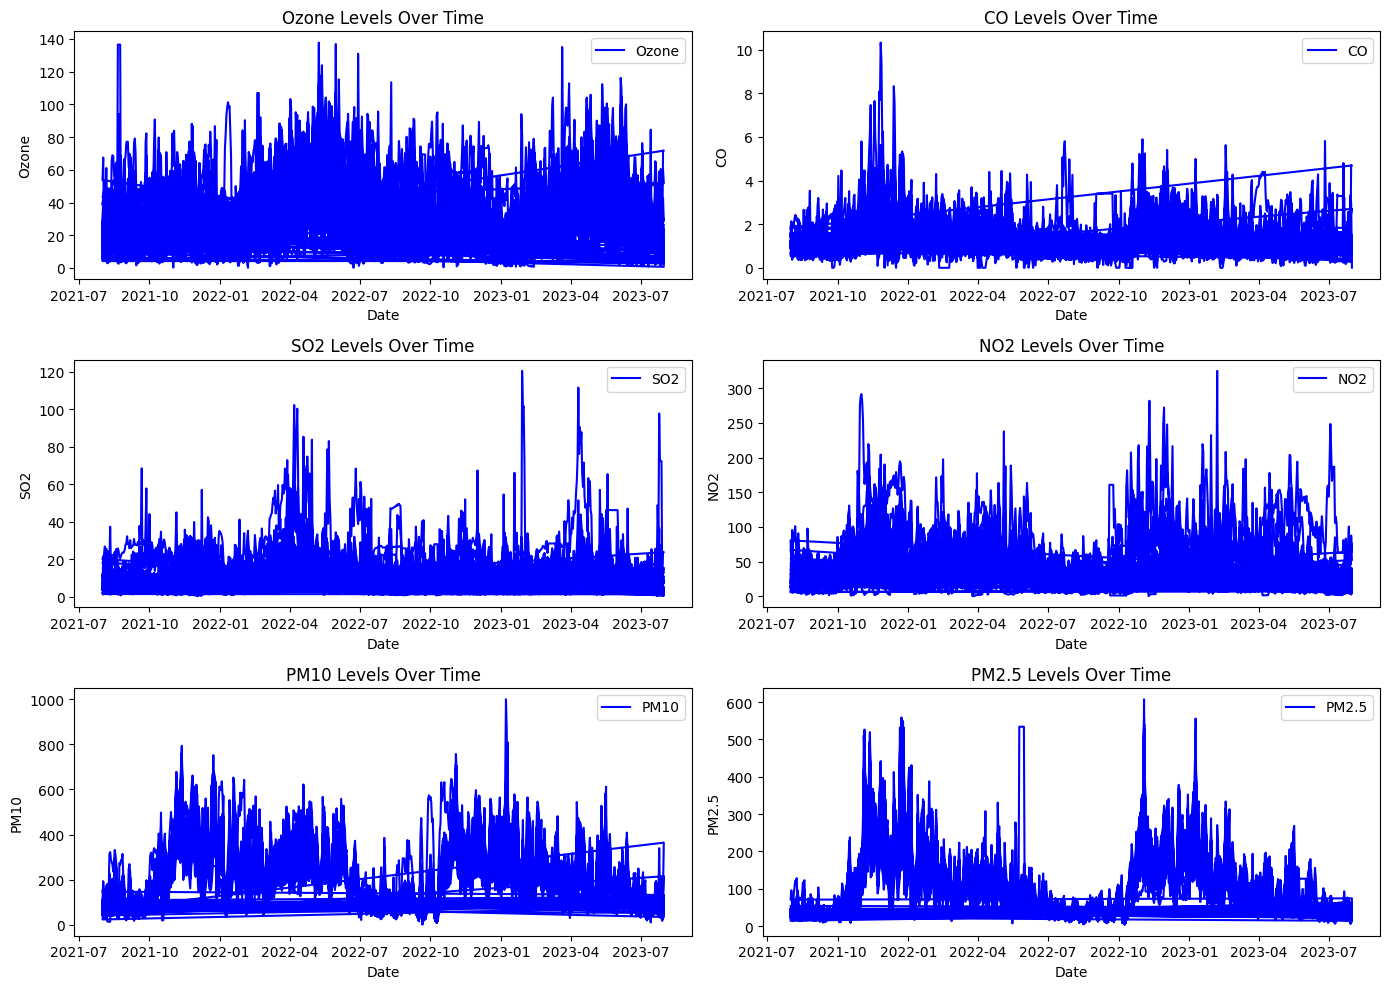

In [8]:
### Step 2: Visualize Trends Over Time ###
# Plot each pollutant over time to observe trends
plt.figure(figsize=(14, 10))
for i, col in enumerate(['Ozone', 'CO', 'SO2', 'NO2', 'PM10', 'PM2.5'], 1):
    plt.subplot(3, 2, i)
    plt.plot(df['From Date'], df[col], label=col, color='blue')
    plt.title(f"{col} Levels Over Time")
    plt.xlabel("Date")
    plt.ylabel(col)
    plt.legend()
plt.tight_layout()
plt.show()

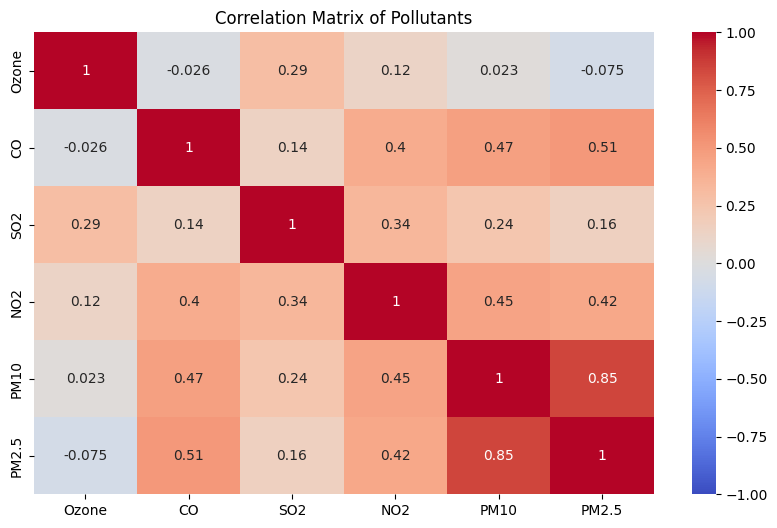

In [9]:
### Step 3: Correlation Analysis ###
# Correlation heatmap for pollutants
plt.figure(figsize=(10, 6))
correlation_matrix = df[['Ozone', 'CO', 'SO2', 'NO2', 'PM10', 'PM2.5']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Pollutants")
plt.show()

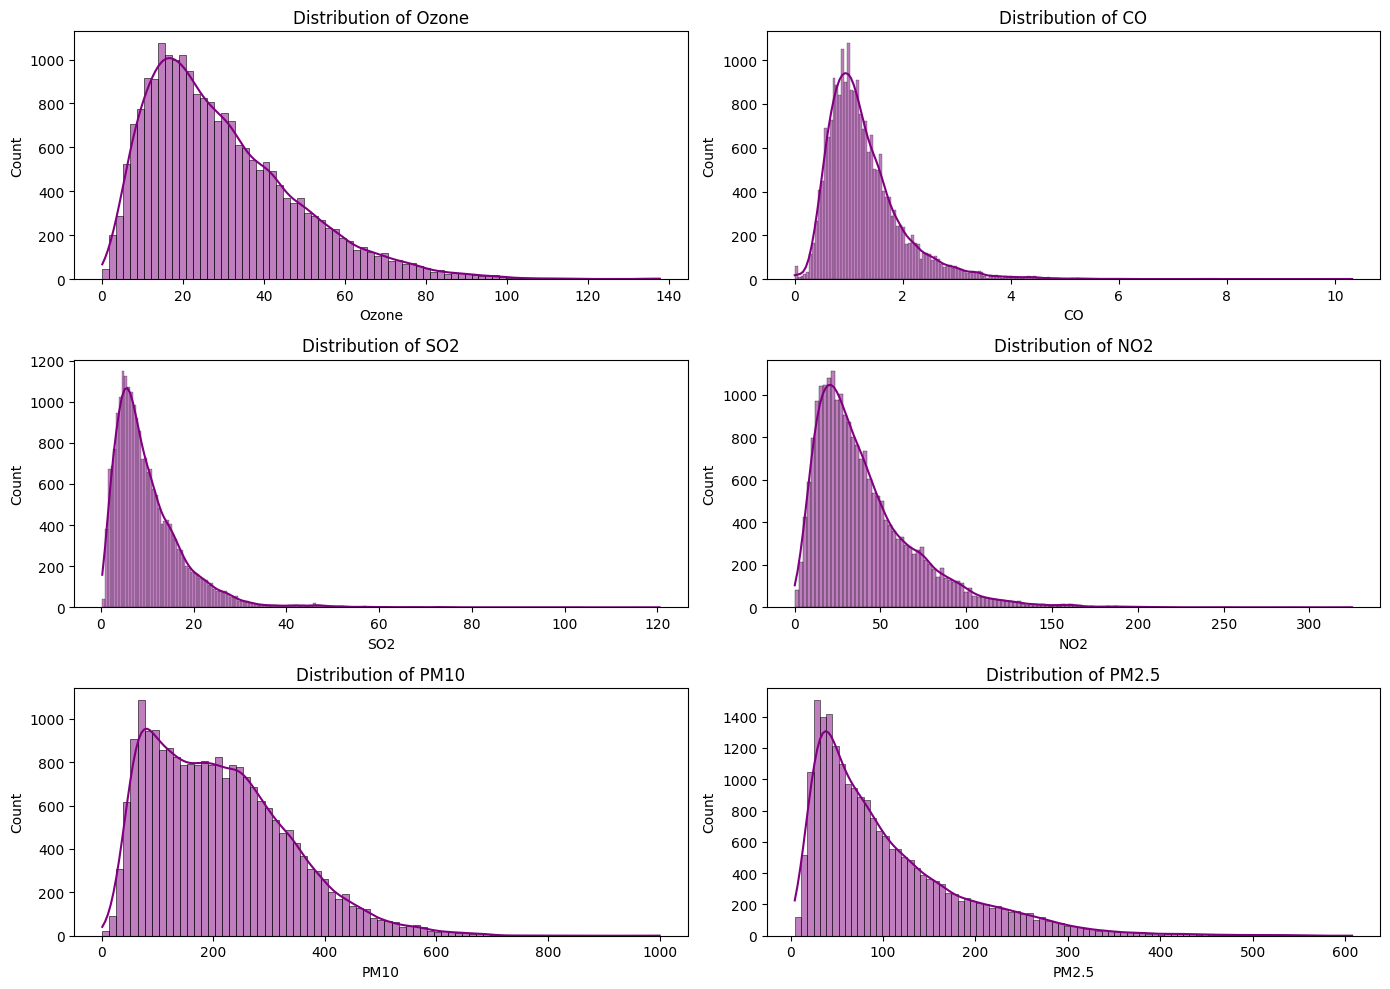

In [10]:
### Step 4: Distribution Analysis ###
# Distribution of each pollutant
plt.figure(figsize=(14, 10))
for i, col in enumerate(['Ozone', 'CO', 'SO2', 'NO2', 'PM10', 'PM2.5'], 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True, color='purple')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
plt.tight_layout()
plt.show()

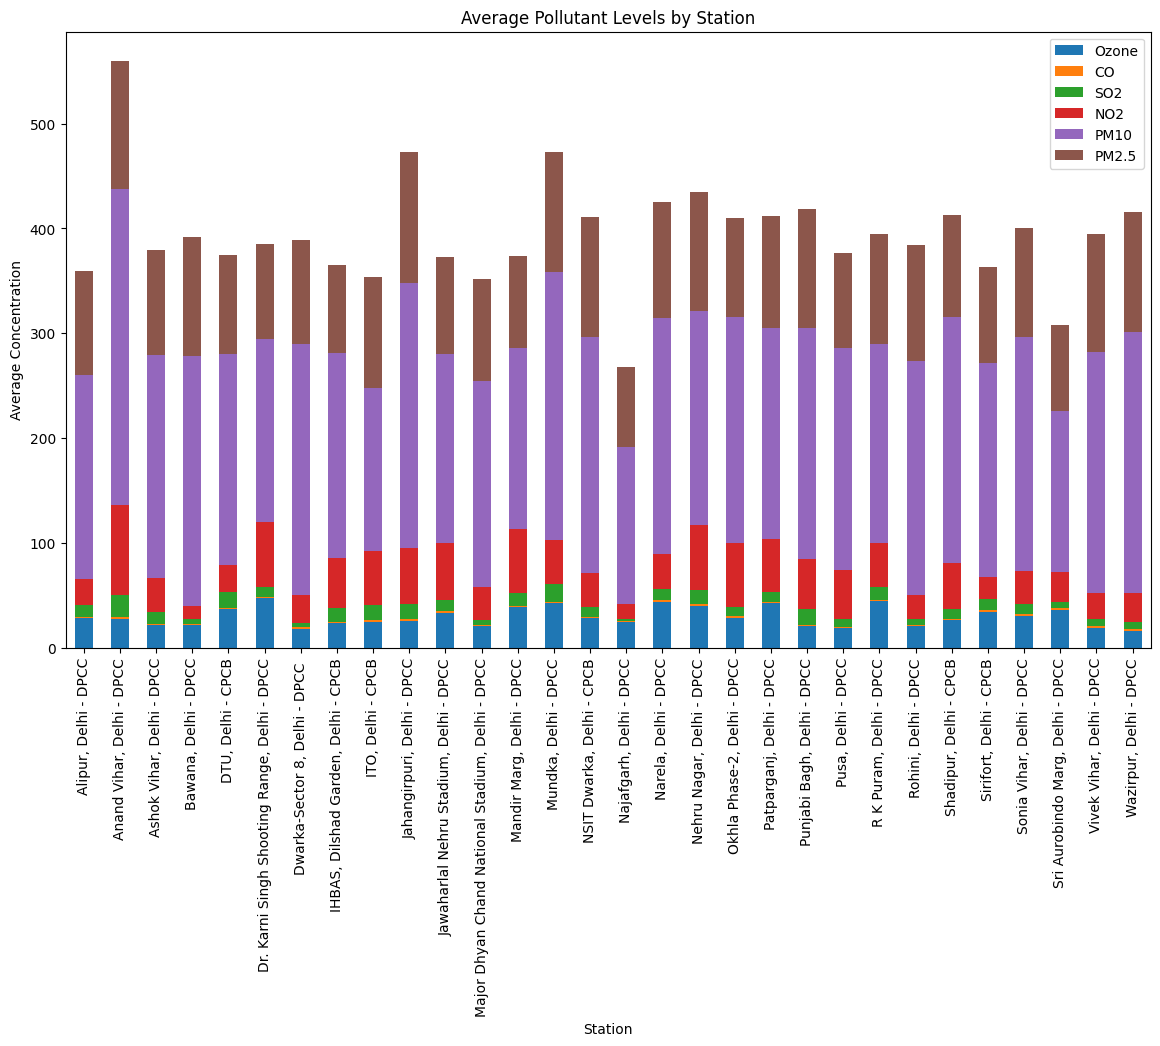

In [11]:
### Step 5: Station-Wise and City-Wise Analysis ###
# Average pollutant levels by Station
station_avg = df.groupby('Station')[['Ozone', 'CO', 'SO2', 'NO2', 'PM10', 'PM2.5']].mean()
station_avg.plot(kind='bar', figsize=(14, 8), stacked=True)
plt.title("Average Pollutant Levels by Station")
plt.ylabel("Average Concentration")
plt.xlabel("Station")
plt.legend(loc="upper right")
plt.show()

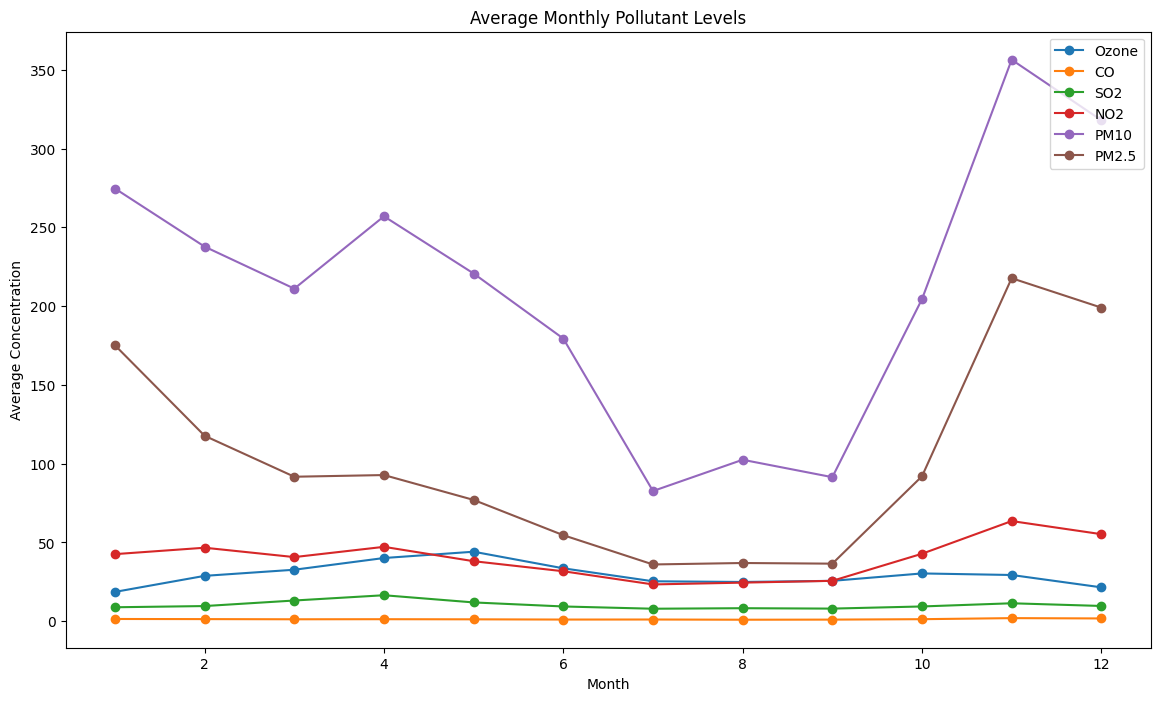

In [12]:
### Step 5: Seasonal Trends ###
# Plot average monthly pollutant levels to observe seasonality
df['Month'] = df['From Date'].dt.month
monthly_avg = df.groupby('Month')[['Ozone', 'CO', 'SO2', 'NO2', 'PM10', 'PM2.5']].mean()

monthly_avg.plot(kind='line', figsize=(14, 8), marker='o')
plt.title("Average Monthly Pollutant Levels")
plt.xlabel("Month")
plt.ylabel("Average Concentration")
plt.legend(loc="upper right")
plt.show()

## Step 3: Modeling
Machine Learning Models:
Split Data: Use a time-series split for training and testing.
Models to Try:
Linear Regression and Decision Trees (for baseline).
Random Forest, Gradient Boosting, XGBoost for more complex patterns.
Evaluation: Use metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-Squared for regression tasks.
Deep Learning Models:
LSTM / GRU: Sequence-based models are effective for time-series data. You can train an LSTM on sequences of pollution data to predict the next day’s values.
CNN-LSTM: A combination model that uses CNN layers to extract spatial features and LSTM to handle the temporal nature of the data.
Evaluation: Evaluate performance using the same metrics as for ML models to ensure consistency.

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

features = ['Ozone', 'CO', 'SO2', 'NO2', 'PM10', 'PM2.5']
target = 'PM2.5'  # Change this to the pollutant you're predicting

# Shift the target column for time series forecasting (1 day ahead)
df['Target'] = df[target].shift(-1)

# Drop rows with NaN target (from shifting)
df.dropna(inplace=True)

X = df[features]
y = df['Target']

# Time-based split for time series modeling
tscv = TimeSeriesSplit(n_splits=5)
ml_results = {}

# ML Model Evaluation
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize Models
    models = {
        "Random Forest": RandomForestRegressor(),
        "Gradient Boosting": GradientBoostingRegressor()
    }
    
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        # Evaluation Metrics
        mae = mean_absolute_error(y_test, predictions)
        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)
        
        if model_name not in ml_results:
            ml_results[model_name] = {"MAE": [], "MSE": [], "R2": []}
        
        ml_results[model_name]["MAE"].append(mae)
        ml_results[model_name]["MSE"].append(mse)
        ml_results[model_name]["R2"].append(r2)

# Display average results for ML models
for model_name, metrics in ml_results.items():
    print(f"\n{model_name} Results:")
    print(f"MAE: {sum(metrics['MAE']) / len(metrics['MAE'])}")
    print(f"MSE: {sum(metrics['MSE']) / len(metrics['MSE'])}")
    print(f"R2 Score: {sum(metrics['R2']) / len(metrics['R2'])}")



Random Forest Results:
MAE: 25.80142365167808
MSE: 1564.7176771579777
R2 Score: 0.7671779145762837

Gradient Boosting Results:
MAE: 25.09994548437617
MSE: 1520.6654551767601
R2 Score: 0.7738685564567562


In [14]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define features and target
features = ['Ozone', 'CO', 'SO2', 'NO2', 'PM10', 'PM2.5']
target = 'Ozone'  # Assuming you're predicting 'Ozone'

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[features])

# Prepare the data for LSTM
sequence_length = 30  # Define how many previous days to use as inputs
X_lstm, y_lstm = [], []

for i in range(sequence_length, len(scaled_data) - 1):
    X_lstm.append(scaled_data[i-sequence_length:i])  # Append sequence of previous 'sequence_length' days
    y_lstm.append(scaled_data[i, features.index(target)])  # Append the target value at 'i'

# Convert to numpy arrays
X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)

# Train-Test Split
split = int(0.8 * len(X_lstm))
X_train, X_test = X_lstm[:split], X_lstm[split:]
y_train, y_test = y_lstm[:split], y_lstm[split:]

# LSTM Model Definition
model = Sequential([
    LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    BatchNormalization(),  # Add batch normalization
    LSTM(units=50, return_sequences=True),
    Dropout(0.3),
    LSTM(units=50, return_sequences=False),
    Dropout(0.3),
    Dense(units=1)
])

# Compile the model with MAE loss and Adam optimizer
model.compile(optimizer='adam', loss='mean_absolute_error')

# Callbacks for better training
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[lr_scheduler, early_stopping],
    verbose=1
)

# Make predictions
predictions = model.predict(X_test)

# Reshape for inverse transformation
y_test_reshaped = np.concatenate([np.zeros((y_test.shape[0], len(features) - 1)), y_test.reshape(-1, 1)], axis=1)
y_test_inverse = scaler.inverse_transform(y_test_reshaped)[:, -1]

predictions_reshaped = np.concatenate([np.zeros((predictions.shape[0], len(features) - 1)), predictions], axis=1)
predictions_inverse = scaler.inverse_transform(predictions_reshaped)[:, -1]

# Evaluation Metrics
mae = mean_absolute_error(y_test_inverse, predictions_inverse)
mse = mean_squared_error(y_test_inverse, predictions_inverse)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inverse, predictions_inverse)

# Output results
print("\nImproved LSTM Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

# Optional: Plotting training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

DataFrame head:
    From Date    To Date  Ozone    CO    SO2    NO2   PM10  PM2.5  State  \
0 2021-08-01 2021-08-02  18.48  0.88   9.89  19.15  59.77  45.89  Delhi   
1 2021-08-02 2021-08-03  17.44  0.98  12.87  21.79  56.22  44.42  Delhi   
2 2021-08-03 2021-08-04  13.18  0.54  13.88  23.08  53.49  33.90  Delhi   
3 2021-08-04 2021-08-05  19.40  0.50  12.16  23.56  69.66  35.70  Delhi   
4 2021-08-05 2021-08-06  21.78  0.54  12.05  24.25  86.49  48.55  Delhi   

    City            Station  Duration (hrs)  Year  Month  Day  Day of Week  \
0  Delhi  DTU, Delhi - CPCB            24.0  2021      8    1            6   
1  Delhi  DTU, Delhi - CPCB            24.0  2021      8    2            0   
2  Delhi  DTU, Delhi - CPCB            24.0  2021      8    3            1   
3  Delhi  DTU, Delhi - CPCB            24.0  2021      8    4            2   
4  Delhi  DTU, Delhi - CPCB            24.0  2021      8    5            3   

   Is Weekend  Target  
0           1   44.42  
1           0  

C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 50)              │          11,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,651 (123.64 KB)

 Trainable params: 31,651 (123.64 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 30s 42ms/step - loss: 0.0092 - val_loss: 0.0060
Epoch 2/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 22s 40ms/step - loss: 0.0059 - val_loss: 0.0051
Epoch 3/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 23s 41ms/step - loss: 0.0053 - val_loss: 0.0049
Epoch 4/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - loss: 0.0050 - val_loss: 0.0049
Epoch 5/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 22s 40ms/step - loss: 0.0052 - val_loss: 0.0048
Epoch 6/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 22s 40ms/step - loss: 0.0051 - val_loss: 0.0048
Epoch 7/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - loss: 0.0048 - val_loss: 0.0048
Epoch 8/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 22s 40ms/step - loss: 0.0047 - val_loss: 0.0048
Epoch 9/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - loss: 0.0048 - val_loss: 0.0048
Epoch 10/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 22s 40ms/step - loss: 0.0049 - val_loss: 0.0048
Epoch 11/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 24s 44ms/step - loss: 0.0050 - val_loss: 0.0047
Epoch 12/20
547/547 ━━━━━━━━━━

## Step 4: Efficiency and Prediction 



Epoch 1/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 30s 42ms/step - loss: 0.0069 - val_loss: 0.0041
Epoch 2/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 22s 40ms/step - loss: 0.0041 - val_loss: 0.0036
Epoch 3/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 23s 42ms/step - loss: 0.0036 - val_loss: 0.0032
Epoch 4/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 22s 40ms/step - loss: 0.0034 - val_loss: 0.0029
Epoch 5/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 22s 40ms/step - loss: 0.0032 - val_loss: 0.0029
Epoch 6/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 22s 40ms/step - loss: 0.0031 - val_loss: 0.0028
Epoch 7/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 22s 40ms/step - loss: 0.0031 - val_loss: 0.0028
Epoch 8/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 22s 40ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 9/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 23s 43ms/step - loss: 0.0029 - val_loss: 0.0027
Epoch 10/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 23s 42ms/step - loss: 0.0031 - val_loss: 0.0027
Epoch 11/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - loss: 0.0030 - val_loss: 0.0027
Epoch 12/20
547/547 ━━━━━━━━━━

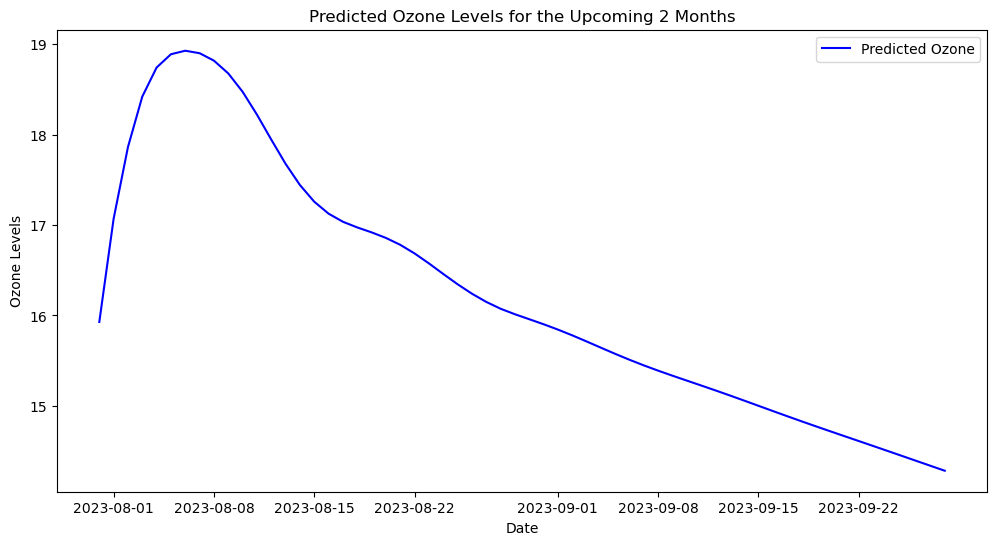

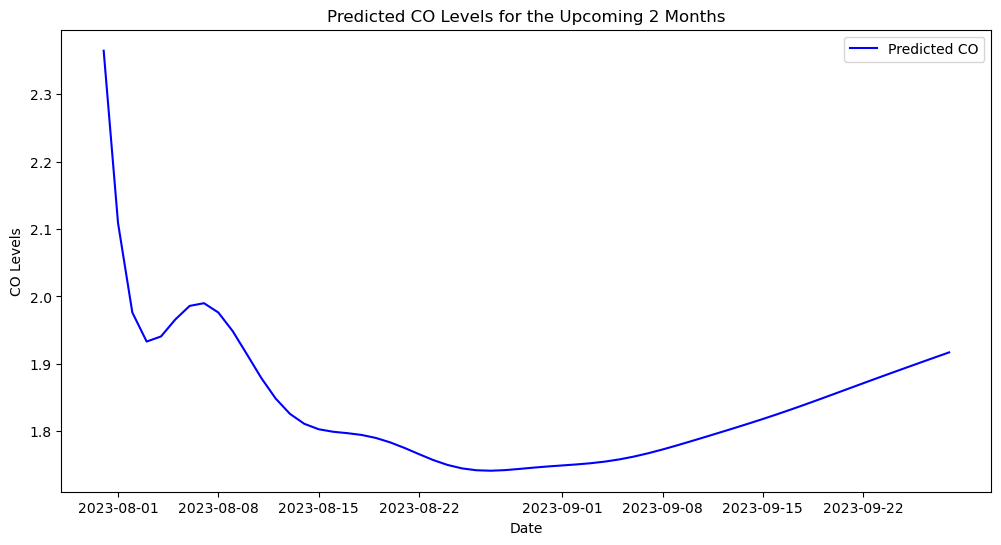

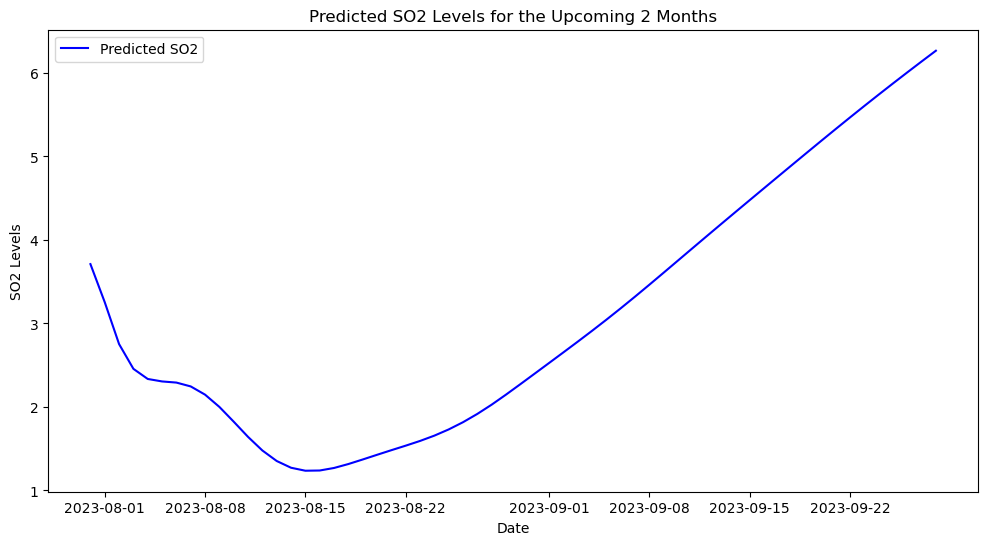

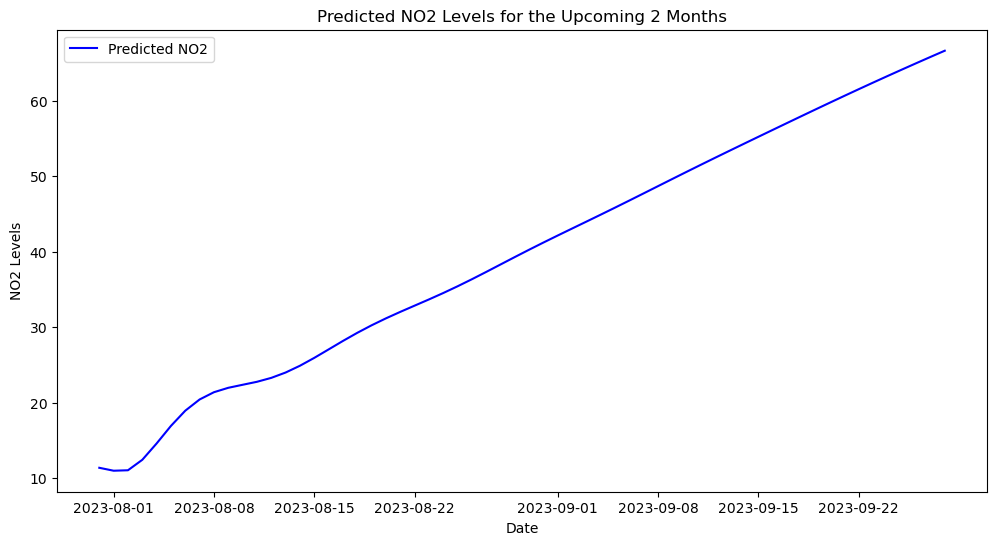

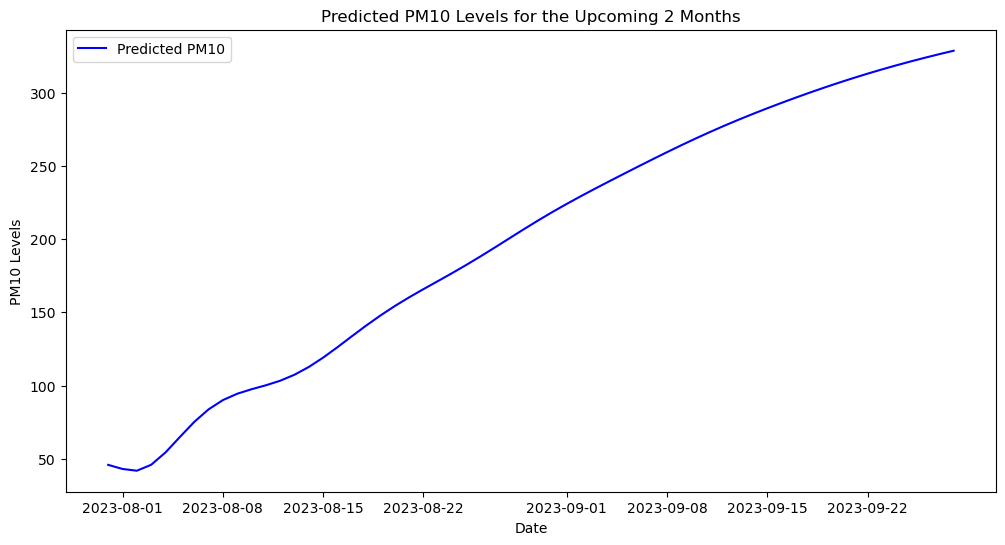

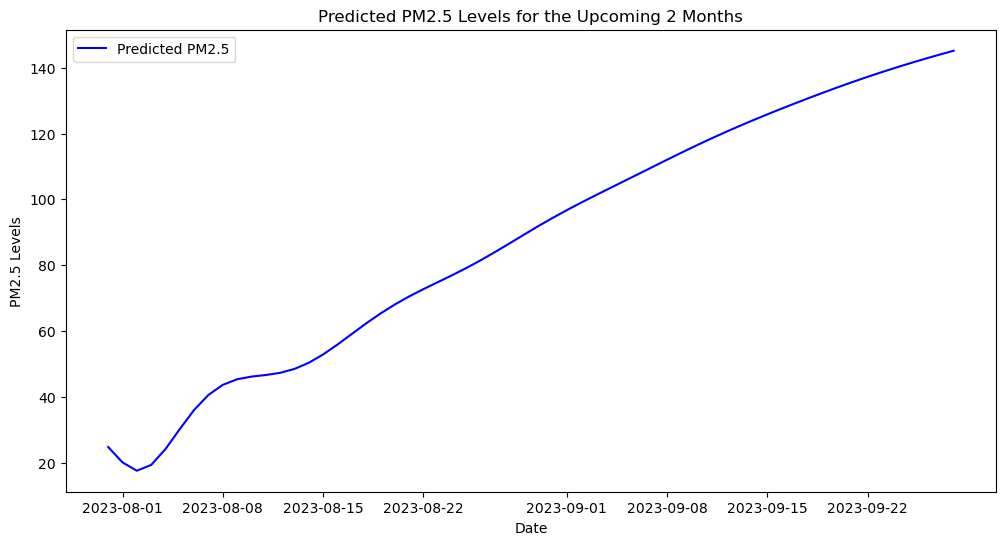

In [15]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, ReLU
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load and preprocess your dataset
# df = pd.read_csv('your_dataset.csv')  # Uncomment and replace with your dataset path

# Assuming 'df' is your DataFrame with the necessary columns
features = ['Ozone', 'CO', 'SO2', 'NO2', 'PM10', 'PM2.5']
target = features  # Predicting all specified pollutants

# Scaling the data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))  # Ensure scaled range is within [0, 1]
scaled_data = scaler.fit_transform(df[features])

# Preparing the data for LSTM
sequence_length = 30  # Number of previous days as input
X_lstm, y_lstm = [], []

for i in range(sequence_length, len(scaled_data) - 1):
    X_lstm.append(scaled_data[i - sequence_length:i])
    y_lstm.append(scaled_data[i])  # Predicting all target pollutants for the day

X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)

# Train-Test Split
split = int(0.8 * len(X_lstm))
X_train, X_test = X_lstm[:split], X_lstm[split:]
y_train, y_test = y_lstm[:split], y_lstm[split:]

# Define and train the LSTM model
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(len(target)),
    ReLU()  # Ensures non-negative output
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Make predictions for the next 2 months (60 days)
predictions = []
last_sequence = scaled_data[-sequence_length:]  # Start with the last sequence from training data

for _ in range(60):  # Predicting for 60 days
    last_sequence_reshaped = last_sequence.reshape((1, last_sequence.shape[0], last_sequence.shape[1]))
    pred = model.predict(last_sequence_reshaped)
    pred = np.clip(pred, 0, None)  # Clip any negative values to 0 as a safeguard
    predictions.append(pred[0])  # Store prediction for all pollutants
    last_sequence = np.append(last_sequence[1:], [pred[0]], axis=0)  # Append new prediction

# Inverse transform predictions to the original scale
predictions_inverse = scaler.inverse_transform(predictions)

# Save predictions to a CSV file
predictions_df = pd.DataFrame(predictions_inverse, columns=target)
predictions_df['Date'] = pd.date_range(start=df['To Date'].iloc[-1], periods=60, freq='D')

# Reorder columns to have Date first
predictions_df = predictions_df[['Date'] + target]

# Save the predictions to CSV
predictions_df.to_csv('predictions_next_2_months_usingLSTM.csv', index=False)
print("Predictions saved to 'predictions_next_2_months_usingLSTM.csv'.")

# Visualization for each pollutant
for i, col in enumerate(target):
    plt.figure(figsize=(12, 6))
    plt.plot(predictions_df['Date'], predictions_df[col], label=f'Predicted {col}', color='blue')
    plt.title(f'Predicted {col} Levels for the Upcoming 2 Months')
    plt.xlabel('Date')
    plt.ylabel(f'{col} Levels')
    plt.legend()
    plt.show()


In [16]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, ReLU
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from datetime import datetime

# Load and preprocess your dataset
# df = pd.read_csv('your_dataset.csv')  # Uncomment and replace with your dataset path

# Assuming 'df' is your DataFrame with the necessary columns
features = ['Ozone', 'CO', 'SO2', 'NO2', 'PM10', 'PM2.5']
target = features  # Predicting all specified pollutants

# Scaling the data for the model
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[features])

# Preparing the data for the model
sequence_length = 30
X, y = [], []

for i in range(sequence_length, len(scaled_data) - 1):
    X.append(scaled_data[i - sequence_length:i])
    y.append(scaled_data[i])

X, y = np.array(X), np.array(y)

# Train-Test Split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Define and train the LSTM model
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(len(target)),
    ReLU()  # Ensures non-negative output
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Make predictions for the next 2 months (60 days)
predictions = []
last_sequence = scaled_data[-sequence_length:]

for _ in range(60):
    last_sequence_reshaped = last_sequence.reshape((1, last_sequence.shape[0], last_sequence.shape[1]))
    pred = model.predict(last_sequence_reshaped)
    pred = np.clip(pred, 0, None)  # Clip negative values to 0
    predictions.append(pred[0])
    last_sequence = np.append(last_sequence[1:], [pred[0]], axis=0)

# Inverse transform predictions
predictions_inverse = scaler.inverse_transform(predictions)

# Save predictions to DataFrame
predictions_df = pd.DataFrame(predictions_inverse, columns=target)
predictions_df['Date'] = pd.date_range(start=df['To Date'].iloc[-1], periods=60, freq='D')
predictions_df = predictions_df[['Date'] + target]

# Take a specific date input from the user
user_date = input("Enter the date (YYYY-MM-DD) for which you want the prediction: ")
try:
    user_date = pd.to_datetime(user_date)
    if user_date in predictions_df['Date'].values:
        prediction_for_date = predictions_df[predictions_df['Date'] == user_date]
        print(f"Predictions for {user_date.date()}:")
        print(prediction_for_date)
    else:
        print("The entered date is outside the 60-day prediction window.")
except Exception as e:
    print("Invalid date format. Please enter a valid date in YYYY-MM-DD format.")


Epoch 1/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - loss: 0.0070 - val_loss: 0.0040
Epoch 2/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - loss: 0.0042 - val_loss: 0.0034
Epoch 3/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - loss: 0.0036 - val_loss: 0.0031
Epoch 4/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - loss: 0.0032 - val_loss: 0.0030
Epoch 5/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - loss: 0.0032 - val_loss: 0.0029
Epoch 6/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - loss: 0.0031 - val_loss: 0.0028
Epoch 7/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - loss: 0.0031 - val_loss: 0.0028
Epoch 8/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 9/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 16s 30ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 10/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 18s 33ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 11/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - loss: 0.0029 - val_loss: 0.0027
Epoch 12/20
547/547 ━━━━━━━━━━

Enter the date (YYYY-MM-DD) for which you want the prediction:  2023-09-01


Predictions for 2023-09-01:
         Date      Ozone        CO       SO2        NO2        PM10      PM2.5
32 2023-09-01  27.260166  1.335447  5.838583  44.153933  210.735272  84.607936
